In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.transforms import offset_copy

from colaml.__main__ import phytbl_from_json

from myconfig import DATASET_DIR
from mydata import filter_table

In [2]:
fish_data_path = DATASET_DIR/'03-fish'/'fish-main-v0.json.gz'
fish_phytbl, fish_columns = phytbl_from_json(fish_data_path, np.inf)

In [3]:
fish_ogtbl = pd.DataFrame.from_dict(
    fish_phytbl.to_dict(), orient='index', columns=fish_columns
).loc[:, lambda df: df.ne(0).sum(axis=0) > len(df) * 0.05]

In [4]:
bact_data_path = DATASET_DIR/'02-bacteria'/'bacteria-main-v0.json.gz'
bact_phytbl, bact_columns = phytbl_from_json(bact_data_path, np.inf)

In [5]:
bact_ogtbl = pd.DataFrame.from_dict(
    bact_phytbl.to_dict(), orient='index', columns=bact_columns
).loc[:, lambda df: df.ne(0).sum(axis=0) > len(df) * 0.05]

0    0.305095
1    0.805160
2    0.957288
3    0.979274
4    0.991315
dtype: float64

0    0.638499
1    0.913593
2    0.968456
3    0.985213
4    0.992057
dtype: float64

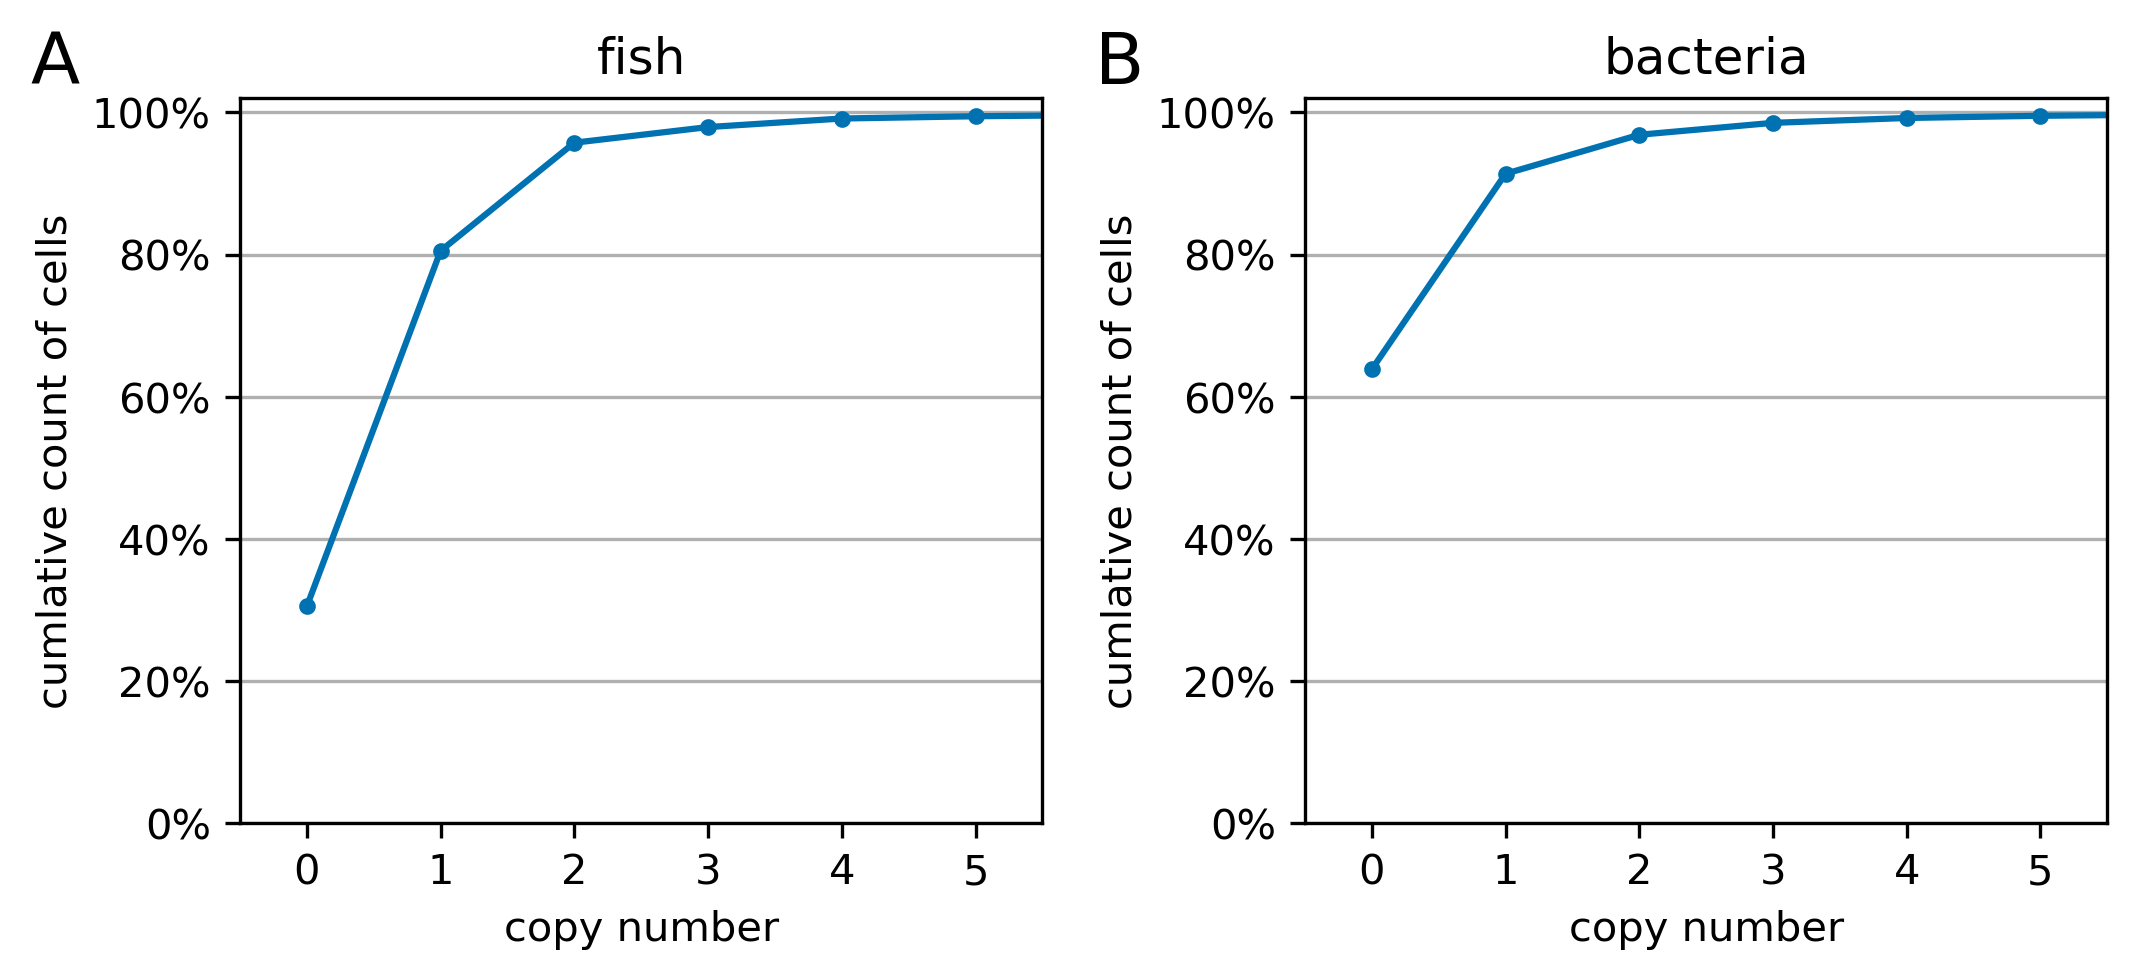

In [6]:
mm = 1 / 25.4

fig, axd = plt.subplot_mosaic(
    'AB', gridspec_kw=dict(wspace=0.05), layout='constrained', 
    figsize=(178*mm, 80*mm), dpi=300
)

data = dict(
    A = dict(ogtbl = fish_ogtbl, title = 'fish'    ), 
    B = dict(ogtbl = bact_ogtbl, title = 'bacteria'), 
)

for idx, ax in axd.items():
    cell_counts = pd.Series(np.bincount(data[idx]['ogtbl'].values.flatten())).cumsum()
    cell_counts.div(np.prod(data[idx]['ogtbl'].shape)).plot(marker='.', c='#0072B2', ax=ax)
    display(cell_counts.div(np.prod(data[idx]['ogtbl'].shape)).head())
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(0, 1.02)
    ax.set_xlabel('copy number')
    ax.set_ylabel('cumlative count of cells')
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.yaxis.grid()
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_title(data[idx]['title'])
    
for idx, ax in axd.items():
    bbox = ax.get_position()
    ax.text(
        0, 1, idx, size='xx-large', 
        transform=offset_copy(ax.transAxes, fig=fig, x=-0.7, y=0.05)
    )
    
fig.savefig('jpg/suppl-dataset1.jpg', bbox_inches='tight', dpi=350)
fig.savefig('png/suppl-dataset1.png', bbox_inches='tight', dpi=350)
fig.savefig('pdf/suppl-dataset1.pdf', bbox_inches='tight')

In [7]:
bact_ogtbl

,COG0001,COG0002,COG0003,COG0004,COG0005,COG0006,COG0007,COG0009,COG0010,COG0011,...,COG5642,COG5646,COG5649,COG5650,COG5652,COG5653,COG5658,COG5660,COG5662,COG5663
n12,3,1,1,3,2,2,1,1,0,0,...,0,0,0,0,0,2,0,0,0,0
n256,0,1,0,2,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
n257,1,1,0,2,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
n204,1,1,0,2,1,1,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
n88,2,1,0,3,2,1,2,1,1,0,...,0,0,0,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n69,1,1,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,2,0,0,0
n153,2,2,1,1,2,2,1,1,2,0,...,0,1,0,1,0,1,0,0,1,0
n84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
n7,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fish_ogtbl

,100038at7898,100039at7898,100063at7898,100080at7898,100097at7898,100102at7898,100157at7898,100179at7898,100191at7898,100208at7898,...,99839at7898,99844at7898,99883at7898,99886at7898,99903at7898,99947at7898,99951at7898,99972at7898,99985at7898,99986at7898
Erpetoichthys_calabaricus,2,1,1,1,0,0,1,0,0,0,...,1,1,0,0,0,0,1,1,0,1
Polypterus_senegalus,2,1,1,2,0,0,1,0,0,0,...,1,1,0,0,0,0,1,1,0,0
Acipenser_ruthenus,4,4,2,0,0,1,2,0,0,0,...,2,2,0,0,0,0,2,1,0,2
Polyodon_spathula,3,2,2,0,2,0,2,0,0,0,...,2,2,0,0,0,0,1,2,0,2
Lepisosteus_oculatus,2,0,1,1,1,0,1,0,1,0,...,1,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Poecilia_reticulata,2,1,1,1,1,4,1,1,0,1,...,1,1,1,1,1,0,1,2,1,1
Gambusia_affinis,2,1,1,1,6,3,1,1,0,1,...,1,1,1,1,1,0,1,2,1,1
Xiphophorus_hellerii,2,1,1,1,0,5,1,1,1,1,...,1,1,1,1,1,0,2,2,1,1
Xiphophorus_maculatus,2,1,1,1,0,2,1,1,0,1,...,1,1,1,1,0,0,1,2,1,1
